In [1]:
# 데이터 가져오기

import pandas as pd

path =  '../bicycle/bicycle_out.csv'

df = pd.read_csv(path, encoding = 'cp949')

df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


42070.0

122.0

In [3]:
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,396.000000,420.000000,409.000000,405.000000,404.000000,420.000000
mean,243.254762,7.585859,93.338095,2.831296,21.269136,2679.678218,35.445238
std,301.148255,6.258985,26.270667,1.687148,20.237064,3028.272755,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.000000,1070.000000,24.000000
50%,117.500000,6.000000,101.000000,2.000000,14.000000,1680.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3757.500000,40.000000
max,3102.000000,30.000000,101.000000,7.000000,122.000000,42070.000000,533.000000


In [4]:
# 대충 봐서 대여소번호, 이용거리, 나이가 조금 문제가 있어보인다.

{'whiskers': [<matplotlib.lines.Line2D at 0x249dc0b5130>,
 'caps': [<matplotlib.lines.Line2D at 0x249dc0b5790>,
 'boxes': [<matplotlib.lines.Line2D at 0x249da09aca0>],
 'medians': [<matplotlib.lines.Line2D at 0x249dc0b5eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249dc0c1280>],
 'means': []}

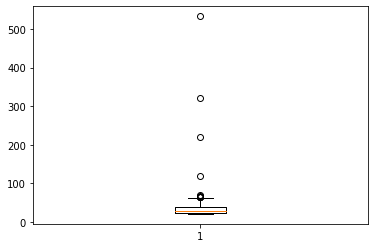

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df['나이'])

In [12]:
import numpy as np

# q1 = np.percentile(df['나이'], 25)
# q3 = np.percentile(df['나이'], 75)

q1, q3 = np.percentile(df['나이'], [25,75])

iqr = q3 - q1

iqr


# iqr 은 중간에 50%의 데이터가 흩어진 정도를 의미한다.

16.0

In [17]:
upperfence = q3 + iqr*1.5
df[df['나이']>upperfence]['나이']

4      120
30     533
47     320
86     220
123     69
148     65
221     66
294     65
362     65
363     67
Name: 나이, dtype: int64

In [18]:
upperfence = q3 + iqr*3
df[df['나이']>upperfence]['나이']

4     120
30    533
47    320
86    220
Name: 나이, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x249ded04c10>,
 'caps': [<matplotlib.lines.Line2D at 0x249ded15370>,
 'boxes': [<matplotlib.lines.Line2D at 0x249ded04880>],
 'medians': [<matplotlib.lines.Line2D at 0x249ded15b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x249dec9e0d0>],
 'means': []}

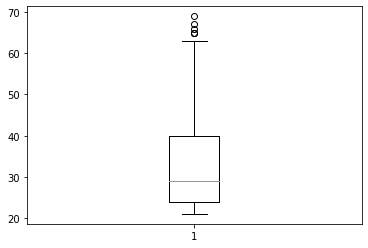

In [33]:
df = df[df['나이']<120]
plt.boxplot(df['나이'])

0

In [ ]:


# 나이는 해결했고 대여소번호, 이용거리 조금 문제가 있어보인다.



{'whiskers': [<matplotlib.lines.Line2D at 0x249decf06d0>,
 'caps': [<matplotlib.lines.Line2D at 0x249decf0df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249decf0340>],
 'medians': [<matplotlib.lines.Line2D at 0x249de613550>],
 'fliers': [<matplotlib.lines.Line2D at 0x249de6138e0>],
 'means': []}

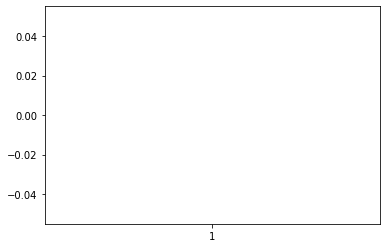

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(df['이용거리'])

In [78]:
df['이용거리'].max()

# max값이 말이안댐.. 자전거타고 갈 거리가 아니다 ㅡㅡ

42070.0

In [79]:
df['이용거리'].isnull().sum()

# plot 가 안돼서 확인해보니까 결측치값이 존재하네요

0

In [80]:
df['이용거리'].mean()

#일단은 평균값을 구해둠

mean1 = df['이용거리'].mean()

In [81]:
df2 = df

In [82]:
df2['이용거리'] = df2['이용거리'].replace(np.nan, mean1)

In [83]:
df2['이용거리'].isnull().sum()

0

In [76]:
## df2['이용거리']=df2['이용거리'].replace(np.nan, mean1)

{'whiskers': [<matplotlib.lines.Line2D at 0x249dec01640>,
 'caps': [<matplotlib.lines.Line2D at 0x249debe14f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249dec01880>],
 'medians': [<matplotlib.lines.Line2D at 0x249debe1df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249ded97310>],
 'means': []}

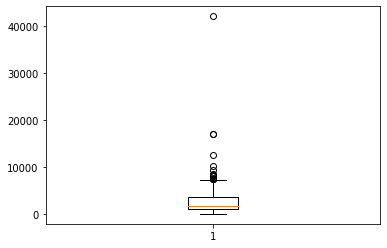

In [84]:
plt.boxplot(df2['이용거리'])

In [89]:
q1 = np.percentile(df2['이용거리'], 25)
q1

1070.0

In [91]:
q3 = np.percentile(df2['이용거리'], 75)
q3

3572.5

In [92]:
iqr = q3 - q1
iqr

2502.5

In [102]:
upperfence = q3 + iqr*1.5
lowerfence = q1 - iqr*1.5
lowerfence

-2683.75

In [96]:
df2[df2['이용거리']>upperfence]['이용거리']

75     42070.0
110    17060.0
111    16910.0
120     8530.0
173     8160.0
221    12610.0
291     8120.0
307     7750.0
317     9310.0
353     8290.0
380     7330.0
398    10260.0
399     7420.0
410     7510.0
419     8100.0
Name: 이용거리, dtype: float64

In [103]:
df2[df2['이용거리']<0]['이용거리']

Series([], Name: 이용거리, dtype: float64)